<진행 순서>  
1. 서울의 기존 정류장들(약 12500개) 중 다람쥐 버스 정류장(95개)을 제외한 나머지 정류장들 중 기존 다람쥐 버스 정류장의 기점, 종점(14개)과 높은 유사도를 지닌 정류장을 100개씩 뽑아 총 1400 정류장으로 추림.
2. 추려진 정류장을 바탕으로 군집 진행하여 특성 파악 

In [1]:
from Modeling.clustering import *


In [2]:
df_bus_not_daram = get_not_daram_station()

# numerical data만 추출
df_bus_not_daram_num = df_bus_not_daram.select_dtypes(include=['int','float'])
df_bus_not_daram.shape

(12453, 24)

In [3]:
df_daram_14 = get_daram_14_station_df()
df_daram_14 = preprocessing_cluster(df_daram_14)
# numerical data만 추출
df_daram_14_num = df_daram_14.select_dtypes(include=['int','float'])
df_daram_14_num.shape

(14, 17)

# 1. 코사인 유사도
- 대상 데이터: 다람쥐 버스 정류장을 제외한 서울 전체 정류장
- 진행방법: 다람쥐 버스 기점, 종점(14개)과의 유사한 정류장을 각각 100개씩, 총 1400개 추출

In [4]:
# df_similar = 코사인 유사도 바탕으로 뽑힌 1400개 정류장
df_similar = get_cosine_similarity(df_daram_14_num,df_bus_not_daram_num,100)
df_similar

,NODE_ID,정류소명,X좌표,Y좌표,법정동코드,법정동_구,법정동,academy_cnt,kindergarten_cnt,mart_cnt,...,tour_cnt,cafe_cnt,hospital_cnt,culture_cnt,univ_hospital_cnt,public_office_cnt,employee_cnt,alone_ratio,emp_corp_ratio,population_15to64
1917,105000001,답십리역사거리,127.0550605,37.56518709,1123010500,동대문구,답십리동,42,9,1,...,1,53,55,0,0,3,18996,0.129167,3.160732,40211
2275,105900047,부속상가,127.0566147,37.5651431,1123010500,동대문구,답십리동,43,13,1,...,1,55,52,0,0,6,18996,0.129167,3.160732,40211
2024,105000114,답십리역사거리,127.0552011,37.56550601,1123010500,동대문구,답십리동,45,10,1,...,1,56,55,0,0,3,18996,0.129167,3.160732,40211
2273,105900045,답십리역.경우회매장입구,127.0534864,37.56747388,1123010500,동대문구,답십리동,45,13,1,...,2,56,59,0,0,4,18996,0.129167,3.160732,40211
2271,105900043,답십리역,127.0531915,37.56676846,1123010500,동대문구,답십리동,45,8,1,...,2,55,57,0,0,3,18996,0.129167,3.160732,40211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5919,112900248,명지대후문(세븐일레븐),126.9248408,37.58149776,1141011800,서대문구,홍은동,78,14,1,...,1,72,16,2,0,2,9633,0.133572,3.133702,33874
9679,119900244,상도역.하나은행,126.9473327,37.50381985,1159010300,동작구,상도1동,114,22,2,...,0,66,42,0,0,1,4630,0.197185,3.683373,16458
5336,111900122,구산전철역,126.9176987,37.61078887,1138010800,은평구,역촌동,159,14,2,...,0,67,56,0,0,1,8796,0.122771,2.643029,32310
9641,119900205,건영아파트,126.9515988,37.50788294,1159010300,동작구,상도1동,52,15,1,...,0,30,12,2,0,0,4630,0.197185,3.683373,16458


In [ ]:
# 1400개 정류장의 위치를 folium을 통해 파악
get_clustering_folium(df_similar, 'X좌표','Y좌표')

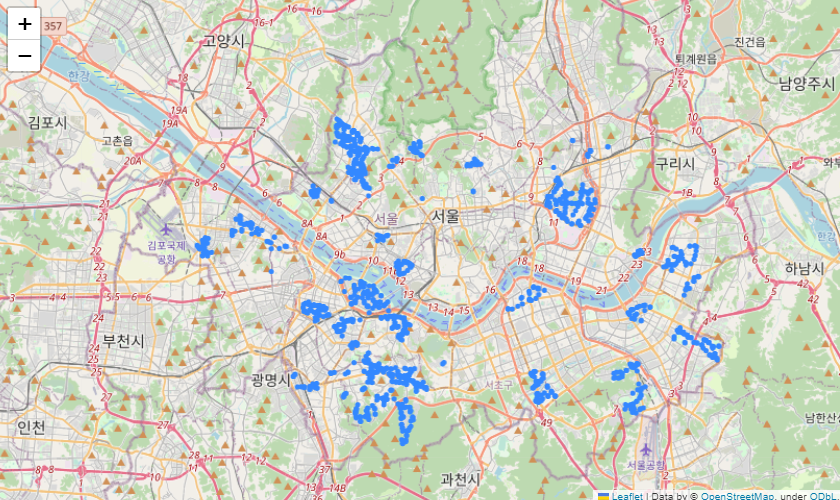

# 2. clustering
- 코사인 유사도를 통해 추출한 1400개의 정류장을 군집.
- 사용기술:
    - Kmeans
    - GMM
    - DBscan

# 2-0. scaler & pca

### 1) scaler

In [6]:
df_similar_num = df_similar.select_dtypes(include=['int','float'])
df_similar_num = df_similar_num.reset_index(drop=True)

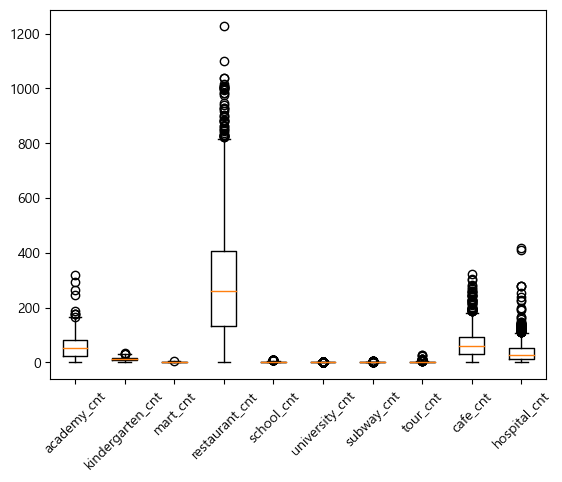

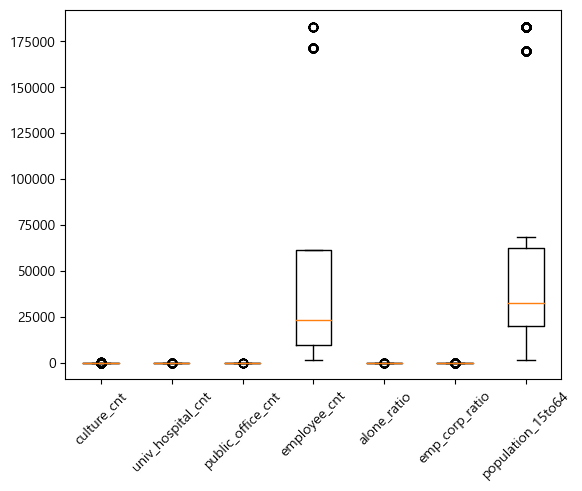

In [79]:
# Extract column names for each subset
subset1_columns = df_similar_num.columns[:10]
subset2_columns = df_similar_num.columns[10:]



plt.boxplot(df_similar_num.iloc[:, :10])
plt.xticks(range(1, len(subset1_columns) + 1), subset1_columns, rotation=45)
plt.show()


plt.boxplot(df_similar_num.iloc[:, 10:])
plt.xticks(range(1, len(subset2_columns) + 1), subset2_columns, rotation=45)
plt.show()



In [58]:
# df_minmax = scaler(df_similar_num, 'minmax')
df_robust = scaler(df_similar_num, 'robust')
# df_standard = scaler(df_similar_num, 'standard')


- 위의 boxplot을 살펴보면 academy, restaurant, hospital 등 이상치가 많은 데이터들이 있다.
- 중앙값과 IQR을 사용하여 이상치에 민감하지 않은 robust scaler를 사용했다.

### 2) PCA

- 현재 데이터는 17차원
- 데이터 피쳐 중 중요한 피처만 뽑아 모델의 설명력, 예측력을 더 높이기 위해 pca 선택


In [80]:
pca_explained_variance_ration(df_robust)

,설명가능한 분산 비율(고윳값),기여율,누적 기여율
pca_1,4.713773,0.312114,0.312114
pca_2,2.932620,0.194178,0.506293
pca_3,1.799264,0.119135,0.625428
pca_4,1.619576,0.107237,0.732665
pca_5,0.778185,0.051526,0.784191
pca_6,0.692365,0.045844,0.830035
pca_7,0.569872,0.037733,0.867768
pca_8,0.457950,0.030322,0.898090
pca_9,0.426697,0.028253,0.926343
pca_10,0.299462,0.019828,0.946172


- pca 차원 선택 기준 
    1. 누적 기여율 > 0.7

- 6차원으로 차원축소 결정

In [98]:
pca_6_df = func_pca(df_robust, 6)
pca_6_df

분산 설명력 :  0.830034992611172


,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6
0,-0.685235,-0.212438,-0.748248,-0.102452,0.587123,1.012812
1,-0.614269,-0.103998,-1.332176,0.218678,0.887316,0.161165
2,-0.663690,-0.191979,-0.827086,-0.086613,0.575508,1.005404
3,-0.507487,-0.087159,-1.058106,-0.116605,1.101297,0.768053
4,-0.528491,-0.136495,-0.716965,-0.216606,0.973189,0.935344
...,...,...,...,...,...,...
1395,-0.638511,-0.980752,-0.311705,1.547432,-0.202508,-1.542311
1396,-0.824940,-0.601846,-1.341149,0.365622,-0.100277,1.084655
1397,-0.737882,-0.679154,-1.779812,1.268901,-0.561485,-0.245609
1398,-1.129155,-1.505035,0.446264,1.156894,-0.503407,-0.505306


## 2-1. kmeans

- kmeans의 군집개수 결정을 위해 사용한 method
  - elbow method
  - calinski score 
  - 실루엣 계수

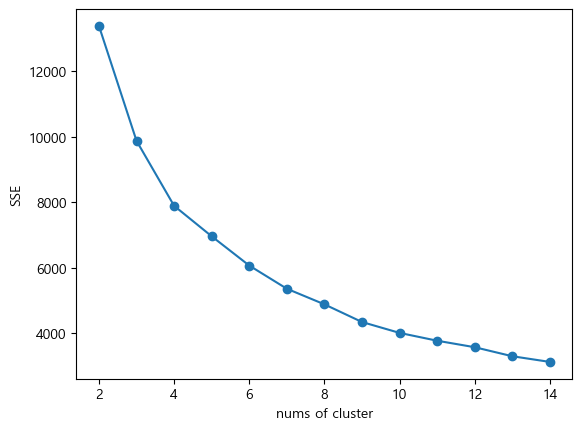

calinski-score 2 개 군집: 432.824098984385
calinski-score 3 개 군집: 541.6017063705145
calinski-score 4 개 군집: 568.73226902681
calinski-score 5 개 군집: 530.0308351286749
calinski-score 6 개 군집: 527.3497464602214
calinski-score 7 개 군집: 527.9117076664725
calinski-score 8 개 군집: 515.8415194343766
calinski-score 9 개 군집: 528.8520431097007
calinski-score 10 개 군집: 521.593067646831
calinski-score 11 개 군집: 507.7209470815295
calinski-score 12 개 군집: 493.9065166636271
calinski-score 13 개 군집: 499.99385442239964
calinski-score 14 개 군집: 492.8378332500359


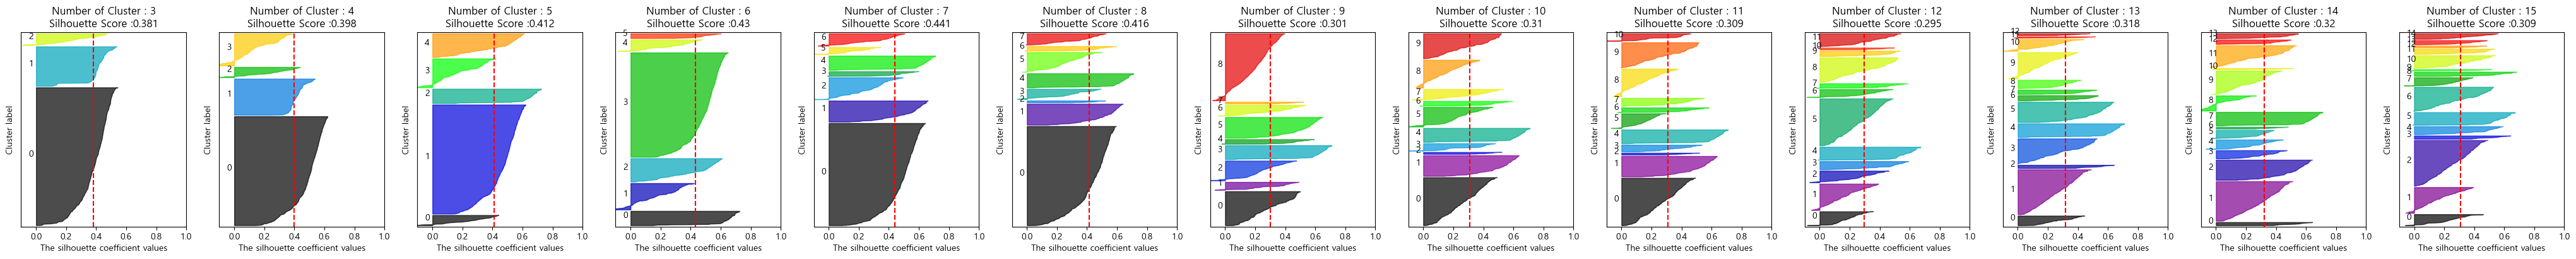

In [99]:
elbow_method(2, 15, pca_6_df)
visualize_silhouette([3,4,5,6,7,8,9,10,11,12,13,14,15],pca_6_df)
calinski_harabasz(2,15, pca_6_df)

- elbow method: 군집 개수 9개에서 기울기가 완만해지기 시작.
- calinski-score:  군집 개수 2~4, 9에서 calinski-score가 상승세. 
- 실루엣 계수: 모두 실루엣 계수가 낮지만, 군집 개수 10~11개가 군집 간 비율이 적절하게 나뉘어졌다고 생각.  
<br></br>
- 최종 군집 개수: 세개의 method를 모두 고려했을 때, Kmeans의 군집 개수는 10개가 가장 적당하다고 생각되어 8개로 결정.

In [107]:
df_kmeans = clustering_kmeans(pca_6_df,10,'k-means++',300,0)
kmeans_label = df_kmeans['kmeans_label']

In [109]:
# del df_similar['kmeans_lst']
df_kmeans_standard = df_similar[::]
df_kmeans_standard['kmeans_label'] = df_kmeans['kmeans_label'].values


In [110]:
get_clustering_folium(df_kmeans_standard,'X좌표','Y좌표','kmeans_label')

## 2-2. GMM

# ⭐⭐⭐⭐⭐⭐⭐gmm에서 왜 robust scaler를 사용했는지 설명해야 할 것. - 정시쿠, 부탁

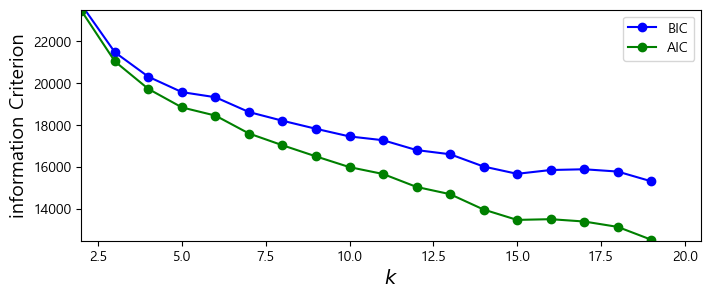

In [111]:
bic_aic(pca_6_df, 2, 20)

In [112]:
df_gmm = clustering_gmm(pca_6_df, 11, 42)
df_gmm

,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,gmm_label
0,-0.685235,-0.212438,-0.748248,-0.102452,0.587123,1.012812,0
1,-0.614269,-0.103998,-1.332176,0.218678,0.887316,0.161165,0
2,-0.663690,-0.191979,-0.827086,-0.086613,0.575508,1.005404,0
3,-0.507487,-0.087159,-1.058106,-0.116605,1.101297,0.768053,0
4,-0.528491,-0.136495,-0.716965,-0.216606,0.973189,0.935344,0
...,...,...,...,...,...,...,...
1395,-0.638511,-0.980752,-0.311705,1.547432,-0.202508,-1.542311,0
1396,-0.824940,-0.601846,-1.341149,0.365622,-0.100277,1.084655,0
1397,-0.737882,-0.679154,-1.779812,1.268901,-0.561485,-0.245609,0
1398,-1.129155,-1.505035,0.446264,1.156894,-0.503407,-0.505306,0


In [113]:
df_gmm_robust_pca = df_similar.copy()
df_gmm_robust_pca['gmm_label']  = df_gmm['gmm_label'].values
df_gmm_robust_pca['gmm_label'].nunique()

11

In [115]:
get_clustering_folium(df_gmm_robust_pca,'X좌표','Y좌표','gmm_label')

## 2-3. DBSCAN

## <clustering 결론>

1. 아래와 같은 이유로 GMM 선택.

|   **Feature**   |                      **KMeans**                      |                             **GMM**                             |     **DB SCAN**     |
|:---------------:|:----------------------------------------------------:|:---------------------------------------------------------------:|:-------------------:|
| **군집 folium** |            ![Image 1](./Data/img/kmeans_folium.png)  |               ![Image 1](./Data/img/gmm_folium.png)          |          #          |
|     **결과**    | 군집 8개/ 각 군집의 특징이 뚜렷하게 구분되지 않음 | 군집 11개/ 노선에 따라 군집이 잘 됨/ 군집 별 특성이 잘 보임 | 채워넣어주세요!!!!! |

2. GMM 군집 결과 해석

| **군집 유형** | **지역**                     | **지역 특징**      |
|:---------:|:--------------------------:|:--------------:|
| 군집0       | 여의도, 광명, 가산디지털 단지          | 업무지구 & 자취      |
| 군집1       | 수서, 오금, 김포                 |                |
| 군집2       | 서울대 입구, 신림, 낙성대            | 역과 먼 거주지       |
| 군집3       | 신촌, 압구정                    |  번화가           |
| 군집4       | 서울대 내부, 근처 아파트             | 대학, 대학교 자취촌    |
| 군집5       | 공덕, 천호                     | 역세권 주변 번화가     |
| 군집6       | 양재 시민의 숲, 상명대, 마곡 개발단지, 가양 |                |
| 군집7       | 응암동, 노량진, 영등포, 답십리..       |                |
| 군집8       | 수색, DMC, 여의도, 잠실           | 대기업 업무지구, 문화시설 |
| 군집9       | 서울대입구역, 신림역                | 역 근처 거주지       |
| 군집10      | 성북동, 영등포                   | 문화거리           |
